# Neutron yield comparison between old and new target

## Figure 13 from thermal analysis paper

- Path to original figure script: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_13_comparison_neutron_output_old_new_Target/Figure_13_comparison_neutron_output_old_new_Target.py

- Path to the datafile: /Users/hkromer/02_PhD/04_Publiations/01_PaperDrafts/2018/01_RotatingTarget/Figures/Figure_13_comparison_neutron_output_old_new_Target/df.csv


- Neutron output scripts are stored in: /Users/hkromer/02_PhD/01.github/phd/05_MCNP/02.output_determination/MCNP_neutron_output/

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import glob
import re
import copy
from datetime import datetime
import sys
sys.path.append('/Users/hkromer/02_PhD/01.github/phd/05_MCNP/02.output_determination/MCNP_neutron_output/')
from fun_getNeutronOutputPer100muSv import *
from scipy.interpolate import interp1d

In [2]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [3]:

output_folder = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/neutron_yield_old_vs_new_target/'

## Old Target

In [7]:
# -------------------------------------------------------------------------------------------
# old target, run from 2017-09-20
# -------------------------------------------------------------------------------------------
fname_path = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/neutron_yield_old_vs_new_target/data/2017-9-20_NG_data.txt'
LB6411_distance = 50

df = pd.read_csv(fname_path, delimiter=',', header=None)
cols = ['Date','Time','High Voltage mean (kV)','Current HV (mA)','pressure (V)','pressure (mbar)', 'BS (V)', 'BS filtered(dose)']
df.columns = cols

df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))
df['Time'] = df['Time'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))
df = df.set_index(['Time'])
df.index = pd.to_datetime(df.index)


df_m_HV = pd.DataFrame()
df_m_HV['HV_voltage'] = df['High Voltage mean (kV)'].resample('1Min').mean()
df_m_HV['HV_current'] = df['Current HV (mA)'].resample('1Min').mean()
df_m_HV['dose'] = df['BS filtered(dose)'].resample('1Min').mean()

df_m_HV.index = df_m_HV.index.strftime('%H:%M:%S')

df = df_m_HV

#def getNeutronOutputPer100muSv(HV=100, LB6411_distance=70, newTarget=1):
neutronOutputPer100muSv = getNeutronOutputPer100muSv(HV=100, LB6411_distance=LB6411_distance, newTarget=0)

df['Neutron_output'] = (df['dose']/100) * neutronOutputPer100muSv

df=df[ (df.index > '20:13:00') & (df.index < '20:40:29') ]
df['Time'] = df.index
# print(df)
# df.reset_index(inplace=True)

# average neutron output (maximum)
avg_output_oldTarget = np.mean(df['Neutron_output'].values)

avg_mA = np.mean(df['HV_current'])
avg_output_per_mA_oldTarget = avg_output_oldTarget/avg_mA

avg_voltage_oldTarget=np.mean(df['HV_voltage'])

avg_power_oldTarget = avg_mA * avg_voltage_oldTarget
avg_output_per_W_oldTarget = avg_output_oldTarget/avg_power_oldTarget

print('Old Target neutron output: {:.3e} n/s'.format(avg_output_oldTarget))
print('Old Target neutron output per mA: {:.3e} n/s/mA'.format(avg_output_per_mA_oldTarget))
print('Old Target average high voltage: {:.2f} kV'.format(avg_voltage_oldTarget))
print('Old Target neutron output per W: {:.3e} n/s/W'.format(avg_output_per_W_oldTarget))

Old Target neutron output: 6.657e+06 n/s
Old Target neutron output per mA: 2.110e+07 n/s/mA
Old Target average high voltage: 100.31 kV
Old Target neutron output per W: 2.103e+05 n/s/W


<ipython-input-7-24d417e571e9>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df.index


## New Target

In [8]:
path_to_data = '/Users/hkromer/polybox/Thesis/Chapters/RotatingIonBeamTarget/Figures/neutron_yield_old_vs_new_target/data/'
df = pd.read_csv(f'{path_to_data}/df.csv', index_col=0)
df.reset_index(inplace=True)


df['time'] = pd.to_datetime(df['time'])
df['time'] =  df['time'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))
df.head()

,time,HV_voltage,HV_current,beam_power,beam_power_leakage_current,dose_corr,HV_voltage_output,neutronOutputPer100muSv,neutron_output
0,13:59:00,0.505932,0.010508,0.005317,-0.070573,2.910625,80.000000,3.010704e+06,8.763032e+04
1,14:00:00,12.223167,0.073667,0.900440,-0.933035,2.218085,80.000000,3.010704e+06,6.677997e+04
2,14:01:00,42.134333,0.211167,8.897367,2.577217,-3.294699,80.000000,3.010704e+06,-9.919365e+04
3,14:02:00,70.723729,0.350678,24.801253,14.192694,24.205141,80.000000,3.010704e+06,7.287452e+05
4,14:03:00,80.377333,0.378667,30.436217,18.379617,132.888918,80.377333,3.011317e+06,4.001707e+06


New Target neutron output: 2.920e+07 n/s
New Target neutron output per mA: 2.972e+07 n/s/mA
New Target voltage in kV: 90.23 kV
New Target current: 0.98 mA
New Target neutron output per W: 3.293e+05 n/s/W
[31.65210606 88.6552979 ]


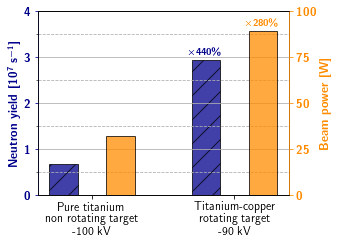

In [11]:


avg_output_newTarget = df['neutron_output'][ df.time == '16:13:00' ].values[0]

avg_current = df['HV_current'][ df.time == '16:13:00' ].values[0]
avg_output_per_mA_newTarget = avg_output_newTarget/avg_current

avg_power_newTarget = (df['HV_current'][ df.time == '16:13:00' ].values[0]) * (df['HV_voltage'][ df.time == '16:13:00' ].values[0])
avg_output_per_W_newTarget = avg_output_newTarget/avg_power_newTarget

avg_voltage_newTarget = df['HV_voltage'][ df.time == '16:13:00' ].values[0]

print('New Target neutron output: {:.3e} n/s'.format(avg_output_newTarget))
print('New Target neutron output per mA: {:.3e} n/s/mA'.format(avg_output_per_mA_newTarget))
print('New Target voltage in kV: {:.2f} kV'.format(avg_voltage_newTarget))
print('New Target current: {:.2f} mA'.format(avg_current))

print('New Target neutron output per W: {:.3e} n/s/W'.format(avg_output_per_W_newTarget))


# plot bar plot with operating power
fig, ax = plt.subplots(1, figsize=(8*0.60,5*0.7))	

X = np.asarray([0.0, 1.0])
X_lbl = [r'Pure titanium' + '\n' + r'non rotating target' + '\n' + r'-100 kV', r'Titanium-copper' + '\n' + r'rotating target' + '\n' + r'-90 kV']
Y_axis_norm = 1e7
Y = np.asarray([avg_output_oldTarget, avg_output_newTarget])/Y_axis_norm
# Y_axis_norm_per_W = 1e5

Y_W = np.asarray([avg_power_oldTarget, avg_power_newTarget])
print(Y_W)
barwidth = 0.2
colors = ['darkblue', 'darkblue']

# minor ticks y
minor_locator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator)

ax.yaxis.grid(b=True, which='major', linestyle='-')#, color='gray')
ax.yaxis.grid(b=True, which='minor', linestyle='--')#, color='gray')


pBar = ax.bar(X,Y, width=barwidth, color=colors, edgecolor='black', alpha=0.75,  hatch = '/')
# ax.text(0+barwidth-barwidth/2,1.5,r'-100 kV')

ax2 = ax.twinx()
colors_2 = ['darkorange', 'darkorange']
pBar_W = ax2.bar(X+barwidth*2,Y_W, width=barwidth, color=colors_2, edgecolor='black', alpha=0.75)
# ax2.text(1+barwidth-barwidth/2,3.5,r'-90 kV')

# print(ticks_label)
ax.xaxis.set_ticks(X+barwidth)
ax.xaxis.set_ticklabels(X_lbl)
ax.tick_params('x', colors='black', labelsize=12)	
ax.tick_params('y', colors=colors[0], labelsize=12)	
ax2.tick_params('y', colors=colors_2[0], labelsize=12)	

ax2.spines['right'].set_color(colors_2[0])
ax.spines['left'].set_color(colors[0])
# ax2.tick_params(axis='y',colors=colors_2[0])

ax.yaxis.set_ticks([0,1,2,3,4])
ax.set_ylim(0,4)
ax2.yaxis.set_ticks(np.arange(0,125,25))
ax2.set_ylim(0,100)

ax.set_ylabel(r'\textbf{Neutron yield [$10^7$ s$^{-1}$]}', fontsize=12, color=colors[0])
ax2.set_ylabel(r'\textbf{Beam power [W]}', fontsize=12, color=colors_2[0])

def autolabel(rect,lbl,c,ax):
    """
    Attach a text label above a bar displaying its height
    """
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.03*height,lbl,color=c,
            ha='center', va='bottom')

autolabel(pBar[1],r'\textbf{$\times$440\%}',colors[0],ax)
autolabel(pBar_W[1],r'\textbf{$\times$280\%}',colors_2[0],ax2)
plt.tight_layout()
plt.savefig(f'{output_folder}neutron_yield_old_vs_new_target.pdf')
plt.show()